# Team DatenWelle

## Exploratory data analysis

This notebook loads the data from JSON format and performs some initial clean-up and visualisation tasks

In [2]:
#!git pull
#!git status
#!git add 1-anya_exploratory_analysis.ipynb
#!git commit -m 'made a set of keywords 2019-2022'
#!git push
#!pip install -r ../requirements.txt

#after installed new libraries
#!pip freeze > requirements.txt
#!git add requirements.txt
#!git commit -m 'added library fuzzywuzzy'
#!git push 

In [19]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import functools
import operator
import os
import os.path as op
import numpy as np

In [71]:
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame.from_dict(data)

#print(df.head())

In [107]:
df = df.sort_values(by= 'lastModifiedDate')

In [111]:
#sns.countplot(y=df.isnull().sum(),data=df)
df = df.reset_index()


In [114]:
df.shape

(175659, 30)

#### Finding the subset of the data for 1 Jan 2019 - 1 Jan 2020 based on lastModifiedDate

In [74]:
datetimes = pd.to_datetime(df['lastModifiedDate'])
df['ts_lastModifiedDate']=datetimes
#df.iloc[ts_start]['ts_lastModifiedDate']


#find start index for subset 2019-2022
ts_start=datetimes[(datetimes > pd.Timestamp(year=2019, month=1, day=1).tz_localize('utc')) 
          & (datetimes < pd.Timestamp(year=2019, month=1, day=2).tz_localize('utc'))].min()
print(ts_start)
#find end date for subset 2019-2022
ts_end=datetimes[(datetimes > pd.Timestamp(year=2022, month=1, day=1).tz_localize('utc')) 
          & (datetimes < pd.Timestamp(year=2022, month=1, day=2).tz_localize('utc'))].min()
print(ts_end)

start_date=datetimes[datetimes == ts_start]
end_date=datetimes[datetimes == ts_end]

#find index for the chosen start and end dates
start_index=start_date.index[0]
print(start_index)
df[df.index == start_date.index[0]]

end_index=end_date.index[0]
print(end_index)
df[df.index == end_date.index[0]]

df_subset=df[start_index:end_index]


2019-01-01 03:57:28.904000+00:00
2022-01-01 02:35:51.098000+00:00
60278
150367


In [75]:
df_subset = df_subset.reset_index()
df_subset

,index,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,...,articles,isOpinion,geographicLocations,contentAssociations,mainContentImageLink,images,externalLinks,topStory,language,ts_lastModifiedDate
0,60278,46912921,"NASA spacecraft enters asteroid Bennu's orbit,...","NASA craft enters asteroid orbit, sets records",<p>NASA's unmanned spacecraft OSIRIS-REx enter...,The OSIRIS-REx spacecraft had arrived at the l...,NASA said its OSIRIS-REx spacecraft succesfull...,,[],"[{'name': 'NASA'}, {'name': 'OSIRIS-REx'}, {'n...",...,"[{'name': 'After two-year journey, NASA Osiris...",False,[],"[{'id': 47376129}, {'id': 47376131}, {'id': 47...",{'description': None},[{'name': 'Sonde «Osiris Rex» nach zwei Jahren...,[{'name': 'DW Newsletter'}],False,None,2019-01-01 03:57:28.904000+00:00
1,60279,46911356,UK brings in boats to patrol English Channel a...,UK deploys boats amid Channel migration spike,<p>Britain will recall two overseas border pat...,The UK is withdrawing patrol ships from overse...,The UK is withdrawing patrol ships from overse...,,[],"[{'name': 'English Channel'}, {'name': 'migrat...",...,[{'name': '40 migrants rescued from boats in E...,False,[],"[{'id': 47375206}, {'id': 47375208}, {'id': 47...",{'description': None},[{'name': 'Großbritanien | Zahl der Bootsflüch...,[],False,None,2019-01-01 06:11:50.527000+00:00
2,60280,46909694,"In Brazil, Jair Bolsonaro tries to unite the e...",Can Bolsonaro unite Brazil's motley right?,<p>Politics without ideologies and party cliqu...,Brazil is inaugurating President Jair Bolsonar...,"In his campaign, Jair Bolsonaro targeted appea...",,[],"[{'name': 'Brazil'}, {'name': 'Jair Bolsonaro'...",...,[{'name': 'Bolsonaro's policies divide Afro-Br...,False,[],"[{'id': 47373913}, {'id': 47374152}, {'id': 47...",{'description': None},[{'name': 'Brasilien - Präsident Jair Bolsonar...,[{'name': ''}],False,None,2019-01-01 06:14:35.563000+00:00
3,60281,46912694,Tokyo: Man deliberately drives van into NYE cr...,Man drives car into Tokyo NYE crowd,<p>At least nine people were injured when a ma...,"A man with an ""intent to murder"" has driven a ...","A man with an ""intent to murder"" has driven a ...",,[],"[{'name': 'Japan'}, {'name': 'Tokyo'}, {'name'...",...,[],False,[],"[{'id': 47376009}, {'id': 47376011}, {'id': 47...",{'description': None},[{'name': 'Japan | Autoangriff in Tokyo'}],[],False,None,2019-01-01 08:26:11.599000+00:00
4,60282,46910092,Bangladesh opposition leader: International co...,International community 'shouldn't recognize n...,"<div class=""vjs-wrapper embed big ""><h2 aria-l...","In an exclusive interview with DW, Kamal Hossa...",Bangladeshi opposition leader Kamal Hossain sl...,,[],"[{'name': 'Asia'}, {'name': 'Bangladesh'}, {'n...",...,[{'name': 'Opinion: Bangladesh's missed chance...,False,[],"[{'id': 47374183}, {'id': 47374251}, {'id': 47...",{'description': None},"[{'name': 'Dr. Kamal Hossain '}, {'name': 'Pre...",[],False,None,2019-01-01 09:05:00.736000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33825,172654,60299904,Germany's Olaf Scholz urges unity in first New...,Germany's Scholz urges unity in first New Year...,"<div class=""vjs-wrapper embed big ""><h2 aria-l...","In his first New Year's message, Olaf Scholz h...","""We will be able to master the major changes o...",,[{'name': 'Germany'}],"[{'name': 'Germany'}, {'name': 'Olaf Scholz'},...",...,[{'name': 'Germany's actual COVID rate '2 or 3...,False,None,"[{'id': 59559319}, {'id': 59559321}, {'id': 59...",{'description': 'German Chancellor Olaf Scholz...,[{'name': 'Deutschland Berlin | Neujahrsanspra...,[],True,ENGLISH,2021-12-31 19:06:43.423000+00:00
33826,172657,60300458,US: Colorado wildfires force tens of thousands...,US: Colorado wildfires force tens of thousands...,<p>Tens of thousands of people in two towns in...,Residents of two communities in the US state o...,Residents of two communities in the US state o...,,[{'name': 'United States of Americ

In [76]:
#start id
print('start id is '+str( df.iloc[int(start_index)]['id'] )+'\n' )

#print(end_date)
print('end id is '+str(df.iloc[int(end_index)]['id'])+'\n') #60305852

start id is 17801447

end id is 51850992



### Keywords exploration

In [9]:
df_subset.keywordStrings

60278                  [NASA, OSIRIS-REx, Bennu, asteroid]
60279    [English Channel, migration, boats, illegal im...
60280    [Brazil, Jair Bolsonaro, Chicago economics, Ha...
60281                     [Japan, Tokyo, Harajuku, attack]
60282    [Asia, Bangladesh, elections, Kamal Hossain, S...
60283    [Iran, sanctions, civil society, nuclear deal,...
60284    [Liviu Dragnea, Viorica Dancila, Klaus Iohanni...
60285    [counterfeit alcohol, adulterated alcohol, fak...
60286    [Edgar Hilsenrath, Schriftsteller, Jude, Der N...
60287      [Indonesia, Java, landslide, natural disasters]
Name: keywordStrings, dtype: object

In [12]:
df_subset.keywordStrings
kw_flat = functools.reduce(operator.add, df_subset.keywordStrings)

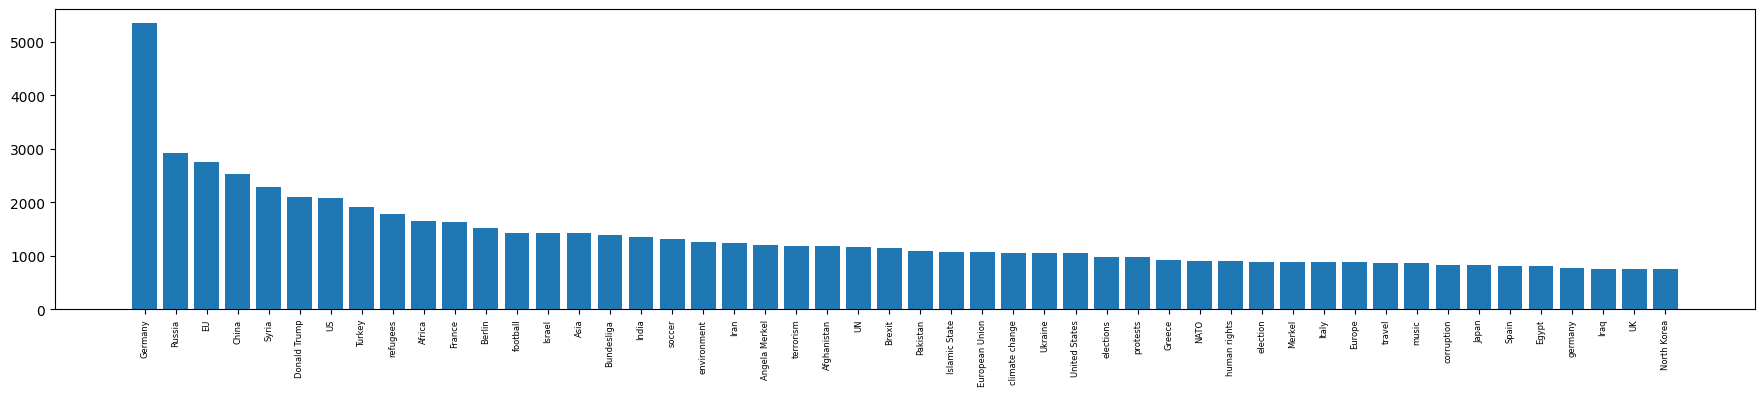

In [15]:
from collections import Counter

freq_kwords = Counter(kw_flat).most_common(50)
x, y = zip(*freq_kwords)

fig = plt.figure(figsize=(17,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y)
plt.xticks(fontsize=6, rotation=90)
plt.show()

In [22]:
output_dir = '/home/marios/S2DS/Spring23_DW/data/processed'
file_name = 'flat_keywords_2019.npy'

np.save(op.join(output_dir, file_name), kw_flat)

In [24]:
kw_flat.count('Angela Merkel')

1206

In [115]:
# df_subset['Angela']
not_angela_indices = []
for i, row in enumerate(df['keywordStrings']):
    if 'Angela Merkel' not in row:
        not_angela_indices.append(i)



In [116]:
df_angela = df.drop(not_angela_indices)


In [117]:
df_angela.lastModifiedDate.values

array(['2010-01-01T06:39:00.000Z', '2010-01-17T20:12:16.000Z',
       '2010-01-22T17:10:00.000Z', ..., '2022-06-09T16:51:14.646Z',
       '2022-06-17T10:34:33.577Z', '2022-06-29T17:49:53.740Z'],
      dtype=object)

In [120]:
df_angela['date_day'] = df_angela.lastModifiedDate.apply(lambda x: x[:10] if x is not None else x)
df_angela['date_month'] = df_angela.lastModifiedDate.apply(lambda x: x[:7] if x is not None else x)



In [128]:
df_angela.date_month.unique()

array(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
       '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01',
       '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08',
       '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02',
       '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08',
       '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
       '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08',
       '2014-09', '2015-01', '2015-02', '2015-03', '2015-04', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', 

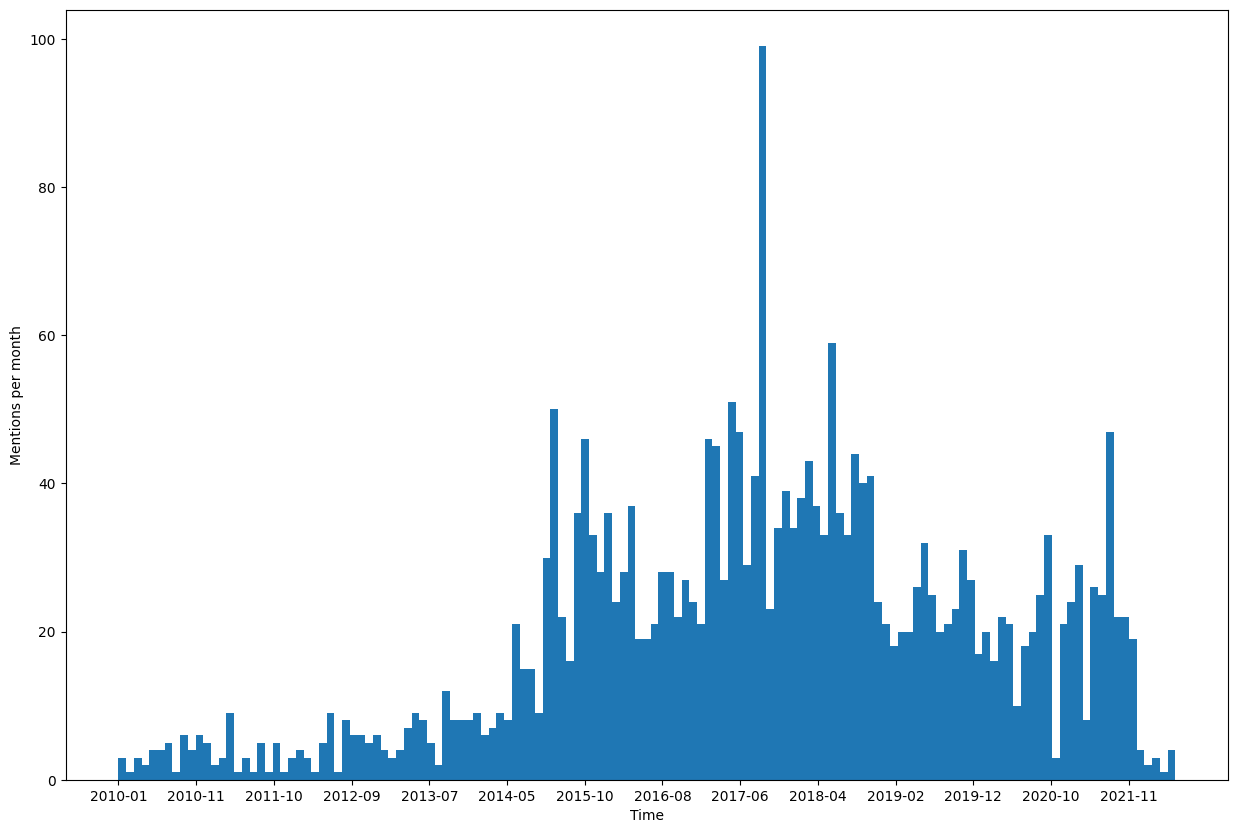

In [132]:
output_dir = '/home/marios/S2DS/Spring23_DW/reports/figures'
fig,ax = plt.subplots(figsize = (15,10))
ax.hist(df_angela.date_month, bins =137)
ax.set_xticks(df_angela.date_month.unique()[::10])
ax.set_xlabel('Time')
ax.set_ylabel('Mentions per month')
fig.savefig(op.join(output_dir,'Angela_Merkel_and_DW_a_love_story.pdf'))
plt.show()

